# Limpeza de dados: Conceitos, Problemas e Tratamento.

In [1]:
#Importar bibliotecas
import pandas as pd
import seaborn as srn
import statistics  as sts

#Importar dados
dataset = pd.read_csv("../Data/Clientes.csv", sep=",")

#Visualizar dados
dataset.head()

,Id,Nome,Idade,Sexo,?
0,1,Lucas,34.0,M,625
1,2,Ana,56.0,F,950
2,3,Pedro,72.0,M,193
3,4,Beatriz,25.0,F,564
4,5,André,43.0,M,426


1) Primeiro problema a resolver será renomear a coluna "?" pela identificação correta.

In [2]:
#Primeiro problema: Renomear a coluna = ?
dataset.rename(columns={"?":"Score"}, inplace=True)
dataset.head()

,Id,Nome,Idade,Sexo,Score
0,1,Lucas,34.0,M,625
1,2,Ana,56.0,F,950
2,3,Pedro,72.0,M,193
3,4,Beatriz,25.0,F,564
4,5,André,43.0,M,426


2) Remover os Dados Nulos.

In [3]:
#Verificar dados nulos e somar.
dataset.isnull().sum()

Id       0
Nome     0
Idade    2
Sexo     0
Score    0
dtype: int64

In [5]:
#Encontrando a mediana
mediana = sts.median(dataset['Idade'])

#Substituindo os valores nulos pela mediana
dataset['Idade'].fillna(mediana, inplace=True)

#Verificar se ainda há dados nulos.
dataset.isnull().sum()

Id       0
Nome     0
Idade    0
Sexo     0
Score    0
dtype: int64

3) Remover valores numéricos que estão fora do nosso domínio.

In [6]:
#Visualizar os valores fora do domínio na idade.
#Dominio: 18 a 100 anos.
dataset.loc[(dataset['Idade'] <  18 ) | ( dataset['Idade'] >  100) ]

,Id,Nome,Idade,Sexo,Score
6,7,João,-30.0,M,1000
25,25,Daniel,110.0,M,534


In [7]:
#Substituir os valores pela mediana.
dataset.loc[(dataset['Idade'] <  0 )  | ( dataset['Idade'] >  100), 'Idade'] = mediana

#Verificar se ainda há idades fora do domínio.
dataset.loc[(dataset['Idade'] <  18 ) | ( dataset['Idade'] >  100) ]

,Id,Nome,Idade,Sexo,Score


4) Outliers.

<Axes: ylabel='Score'>

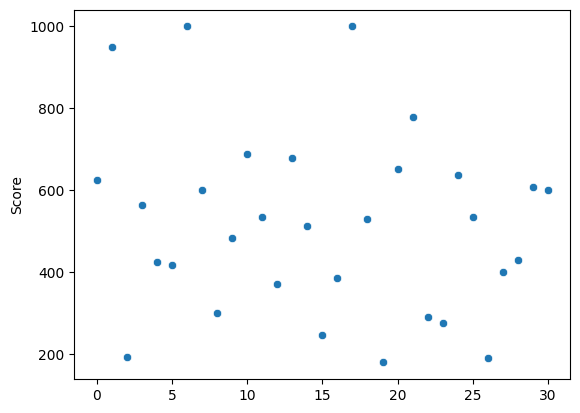

In [10]:
#Gráfico de dispersão considerando o Score.
score = dataset['Score']
srn.scatterplot(data=score)

<Axes: ylabel='Score'>

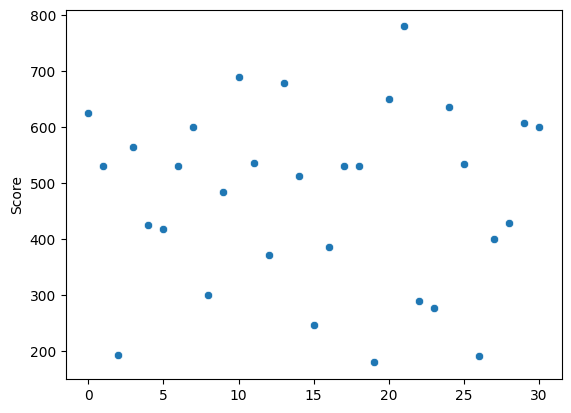

In [12]:
#Nesse caso vamos considerar os outliers como valores > 800.
dataset.loc[dataset['Score'] > 800 ]
#Calcular a mediana. 
mediana = sts.median(dataset['Score'])
#Substituir os outliers pela mediana.
dataset.loc[dataset['Score'] > 800, 'Score'] = mediana
#Verificar se ainda há outliers.
srn.scatterplot(data=score)

5) Falta de padrão nos valores categóricos.

In [13]:
#Explorando a coluna Sexo.
valores = dataset.groupby(['Sexo']).size()
valores

Sexo
F           12
FEM          2
Feminino     1
M           14
MAS          2
dtype: int64

In [14]:
#Padronizando os valores de Sexo.
dataset.loc[dataset['Sexo'] ==  'MAS', 'Sexo'] = "M"
dataset.loc[dataset['Sexo'].isin( ['FEM','Feminino']), 'Sexo'] = "F"
#Visualiza o resultado
valores = dataset.groupby(['Sexo']).size()
valores

Sexo
F    15
M    16
dtype: int64

6) Remover dados duplicados.

In [15]:
#Dados duplicados, buscamos pelo ID(dado unico)
dataset[dataset.duplicated(['Id'],keep=False)]

,Id,Nome,Idade,Sexo,Score
14,15,Eduardo,52.0,M,513
15,15,Eduardo,52.0,M,247


In [16]:
#Excluir os dados duplicados.
#keep = manter a primeira ocorrencia e excluir as demais.
dataset.drop_duplicates(subset="Id", keep='first',inplace=True)

#Buscando se ainda há duplicados.
dataset[dataset.duplicated(['Id'],keep=False)]

,Id,Nome,Idade,Sexo,Score
